# BL40A2010 Introduction to IoT-Based Systems

## Assignment 2, 05.02.2021

### Author: Alex Beattie

**(1) Give one example of each of the following type of data.**

Answer:

(a) Analog: Playing a record on a record player is an analog way to play music.
	
(b) Digital: Streaming a TV across the internet is a digital way to watch TV

(c) Primary: The weather report for the last week in Lappeenranta is an example of primary data

(d) Secondary (i.e., lack of data that is informative): Walking into the Karankokatu yard at midnight on a Friday night
and not hearing any noise and concluding that since there is no noise there is not a party going on is an example of
secondary data.

(e) Metadata: Metadata can be attached to an online purchase to give additional information about the shoppers location
(based on ip address) and purchasing history.

(f) Environmental: The snow on the ground in Lapppeenranta is environmental information that it is cold and winter in Finland.

**(2) Write one example when the same structured data can be classified as (a) information, (b) redundancy and (c) not interpretable.**


Answer:

    A good example of structured data that can be classified in the three categories above is a C program for an embedded
    microcontroller (like arduino). To the microcontroller and programmer the program is information. To a non-programmer the
    data is not inerpretable since they do not know how to read code. If the microcontroller already has the program loaded
    onto it the program is redundant information to the microcontroller.

**(3) Photo-voltaic generation converts the sun's radiation into usable electricity. In this task, you will get the *direct solar radiation* with 1 minute time interval from the *Radiation observations*  at [FMI](http://en.ilmatieteenlaitos.fi/download-observations#!/). Plot radiation profile of three different days so that one must be in March, other in July and the last in December (regardless of the year). Provide *information* about the potential of solar generation in those days. You can also select the measuring station (but write it in the answer).**

*Hint:* Code like in the tutorial notebook.

Data collected from "Jokioinen Ilmala" because it's the closest station to lappeenranta that measured this data


In [31]:
#Import libraries
import datetime
import pandas as pd #https://pandas.pydata.org/
import matplotlib.pyplot as plt #https://matplotlib.org/
import matplotlib.dates as mdates #https://matplotlib.org/
#http://en.ilmatieteenlaitos.fi/download-observations#!/
#Note parse_dates to combine the 5 first columns, also note that the separator from
#decimal is "." and data separator is ","

radiation_march = pd.read_csv("radiation-march-june.csv",dayfirst=True,sep=",",
                           header=0,decimal=b".",index_col=0,
                           parse_dates= [[0, 1, 2, 3]],usecols=[0,1,2,3,5])

radiation_june = pd.read_csv("radiation-june.csv",dayfirst=True,sep=",",
                           header=0,decimal=b".",index_col=0,
                           parse_dates= [[0, 1, 2, 3]],usecols=[0,1,2,3,5])

radiation_dec = pd.read_csv("radiation-dec.csv",dayfirst=True,sep=",",
                           header=0,decimal=b".",index_col=0,
                           parse_dates= [[0, 1, 2, 3]],usecols=[0,1,2,3,5])


day_march = radiation_march.loc[(radiation_march.index.month == 3) & (radiation_march.index.day == 1)]
day_june = radiation_june.loc[(radiation_june.index.month == 6) & (radiation_june.index.day == 1)]
day_dec = radiation_dec.loc[(radiation_dec.index.month == 12) & (radiation_dec.index.day == 1)]

day1 = 'March 1'
day2 = 'June 1'
day3 = 'December 1'
#Difference
delta1 = day_march.index[0].date() - day_june.index[0].date()
#
delta2 = day_march.index[0].date() - day_dec.index[0].date()

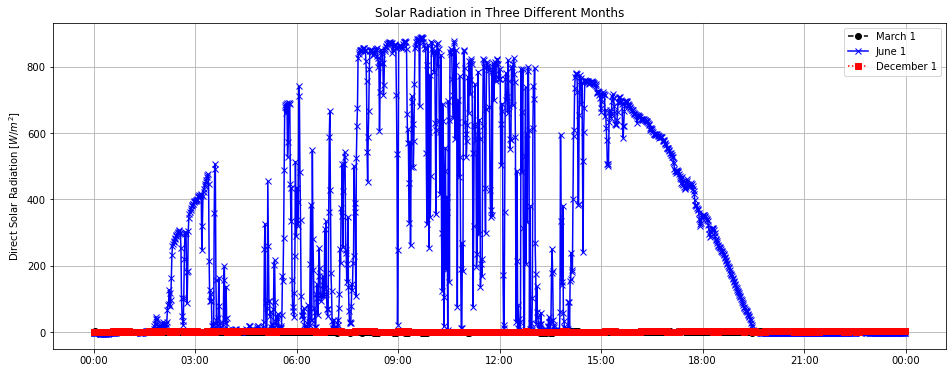

In [37]:
fig, ax = plt.subplots(1,figsize=(16,6))

#
plt.plot(day_march.index, day_march.values, label=day1, color='black',
         marker='o',linestyle='--')
#
plt.plot(day_june.index + pd.offsets.Day(delta1.days),
         day_june.values, label=day2, color='blue', marker='x',linestyle='-')
#
plt.plot(day_dec.index + pd.offsets.Day(delta2.days),
         day_dec.values, label=day3, color='red', marker='s',linestyle=':')

plt.title('Solar Radiation in Three Different Months')
plt.ylabel("Direct Solar Radiation [$W/m^2$]")

plt.legend()
plt.grid(True)

xfmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)
plt.show()



This plot shows that solar generation at this location is not very feasible in December and March. Since the Direct Solar Radiation
during those periods is very low. Another conclusion is that it could have been cloudy on the two days sampled in those months and there
is a higher probability for more direct solar radiation when it is sunny. From empirical evidence (living in Finland) and the data presented here
it can be reasonably concluded that it is difficult to generate solar energy in Finland since the period where there is significant
direct solar radiation is mostly limited to the summer.

**(4) Read the text [Blockchains Use Massive Amounts of Energy—But There’s a Plan to Fix That](https://www.technologyreview.com/s/609480/bitcoin-uses-massive-amounts-of-energybut-theres-a-plan-to-fix-it/). Write a brief analysis of the text based on the relation between data, energy and level of processes. Note: This is clearly not a right/wrong question, but a space to critically think about current issues related to the course.**

Answer: It is interesting that the foundations of modern cryptocurrency are based on "proof of work". By having miners
generate signatures until they are able to guess one correctly, they are expending a massive amount of energy in compute resources.
Additionally, as the block chain grows the amount of energy required only increases. This means turning data into information requires
a large amount of energy. This is obviously problamatic because of the energy consumption and generation problem worldwide. 
Hopefully in the future cryptocurrency will evolve to use much less energy to turn data into valid information and shift to a 
"proof of stake" model. 